<a href="https://colab.research.google.com/github/radhakrishnan-omotec/lung-repository/blob/main/4_Lung_Cancer_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!git clone https://github.com/radhakrishnan-omotec/lung-repository.git

Cloning into 'lung-repository'...
remote: Enumerating objects: 39, done.
remote: Counting objects: 100% (39/39), done.
remote: Compressing objects: 100% (38/38), done.
remote: Total 39 (delta 20), reused 0 (delta 0), pack-reused 0
Receiving objects: 100% (39/39), 2.79 MiB | 9.89 MiB/s, done.
Resolving deltas: 100% (20/20), done.


#EDA:
Analysis on the collected data & Generating various visualizations (scatter plots, histograms, bar plots) to explore relationships between different variables of the dataset.

In [3]:
import cv2
import pandas as pd
import matplotlib.pyplot as plt



In [4]:
# Load the data from the CSV file
df = pd.read_csv('/content/lung-repository/lung_cancer (D3).csv')

df.head()


,pid,age,gender,race,smoker,days_to_cancer,stage_of_cancer
0,100001,70,Male,White,Current,NaN,NaN
1,100002,66,Male,White,Current,NaN,NaN
2,100003,64,Male,White,Current,NaN,NaN
3,100004,60,Male,White,Former,NaN,NaN
4,100005,64,Male,White,Former,NaN,NaN


In [5]:
# Load the data from the CSV file
df = pd.read_csv('/content/lung-repository/cancer patient data (D2).csv')

df.head()

,index,Patient Id,Age,Gender,Air Pollution,Alcohol use,Dust Allergy,OccuPational Hazards,Genetic Risk,chronic Lung Disease,...,Fatigue,Weight Loss,Shortness of Breath,Wheezing,Swallowing Difficulty,Clubbing of Finger Nails,Frequent Cold,Dry Cough,Snoring,Level
0,0,P1,33,1,2,4,5,4,3,2,...,3,4,2,2,3,1,2,3,4,Low
1,1,P10,17,1,3,1,5,3,4,2,...,1,3,7,8,6,2,1,7,2,Medium
2,2,P100,35,1,4,5,6,5,5,4,...,8,7,9,2,1,4,6,7,2,High
3,3,P1000,37,1,7,7,7,7,6,7,...,4,2,3,1,4,5,6,7,5,High
4,4,P101,46,1,6,8,7,7,7,6,...,3,2,4,1,4,2,4,2,3,High


In [6]:
# Load the data from the CSV file
df = pd.read_csv('/content/lung-repository/survey lung cancer (D1).csv')

df.head()

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,M,69,1,2,2,1,1,2,1,2,2,2,2,2,2,YES
1,M,74,2,1,1,1,2,2,2,1,1,1,2,2,2,YES
2,F,59,1,1,1,2,1,2,1,2,1,2,2,1,2,NO
3,M,63,2,2,2,1,1,1,1,1,2,1,1,2,2,NO
4,F,63,1,2,1,1,1,1,1,2,1,2,2,1,1,NO


#EDA IMPLEMENATION:


In [7]:
import pandas as pd

# Load the CSV data
df = pd.read_csv('/content/lung-repository/survey lung cancer (D1).csv')

# Display the first 5 rows of the dataframe
print("First 5 rows of the dataset:")
print(df.head())

# Display basic information about the dataset
print("\nDataset Information:")
print(df.info())

# Summary statistics for numerical columns
print("\nSummary Statistics:")
print(df.describe())

# Check for missing values
print("\nMissing Values:")
print(df.isnull().sum())


First 5 rows of the dataset:
  GENDER  AGE  SMOKING  YELLOW_FINGERS  ANXIETY  PEER_PRESSURE  \
0      M   69        1               2        2              1   
1      M   74        2               1        1              1   
2      F   59        1               1        1              2   
3      M   63        2               2        2              1   
4      F   63        1               2        1              1   

   CHRONIC DISEASE  FATIGUE   ALLERGY   WHEEZING  ALCOHOL CONSUMING  COUGHING  \
0                1         2         1         2                  2         2   
1                2         2         2         1                  1         1   
2                1         2         1         2                  1         2   
3                1         1         1         1                  2         1   
4                1         1         1         2                  1         2   

   SHORTNESS OF BREATH  SWALLOWING DIFFICULTY  CHEST PAIN LUNG_CANCER  
0              

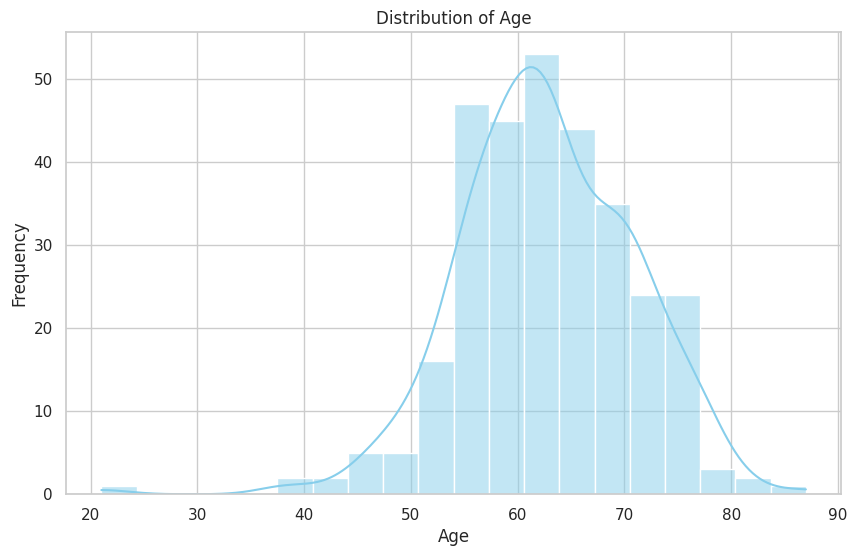

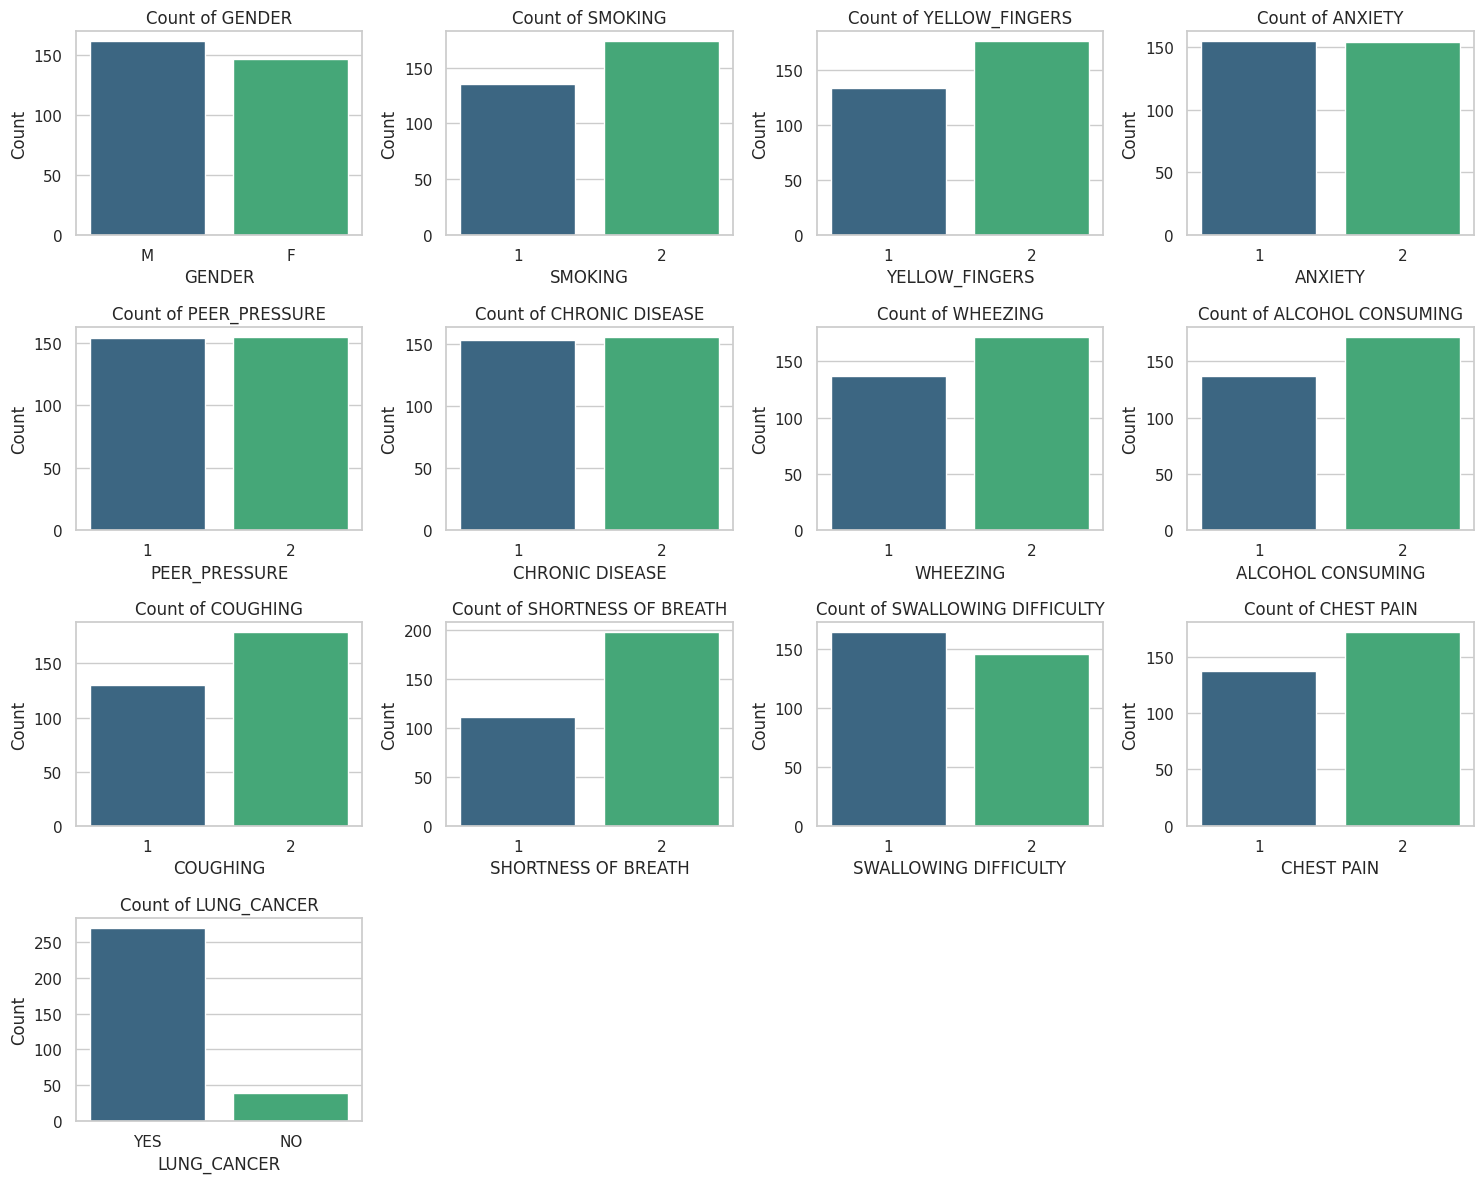

In [8]:
# Visualize the distribution of numerical columns
import matplotlib.pyplot as plt
import seaborn as sns

# Set seaborn style
sns.set(style="whitegrid")

# Visualize Age distribution
plt.figure(figsize=(10, 6))
sns.histplot(df['AGE'], bins=20, kde=True, color='skyblue')
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

# Visualize the count of values in categorical columns
categorical_columns = ['GENDER', 'SMOKING', 'YELLOW_FINGERS', 'ANXIETY', 'PEER_PRESSURE', 'CHRONIC DISEASE',
                        'WHEEZING', 'ALCOHOL CONSUMING', 'COUGHING', 'SHORTNESS OF BREATH',
                        'SWALLOWING DIFFICULTY', 'CHEST PAIN', 'LUNG_CANCER']

plt.figure(figsize=(15, 12))
for i, column in enumerate(categorical_columns, 1):
    plt.subplot(4, 4, i)
    sns.countplot(x=column, data=df, palette='viridis')
    plt.title(f'Count of {column}')
    plt.xlabel(column)
    plt.ylabel('Count')

plt.tight_layout()
plt.show()

# 1. EDA using Scatter Plots:

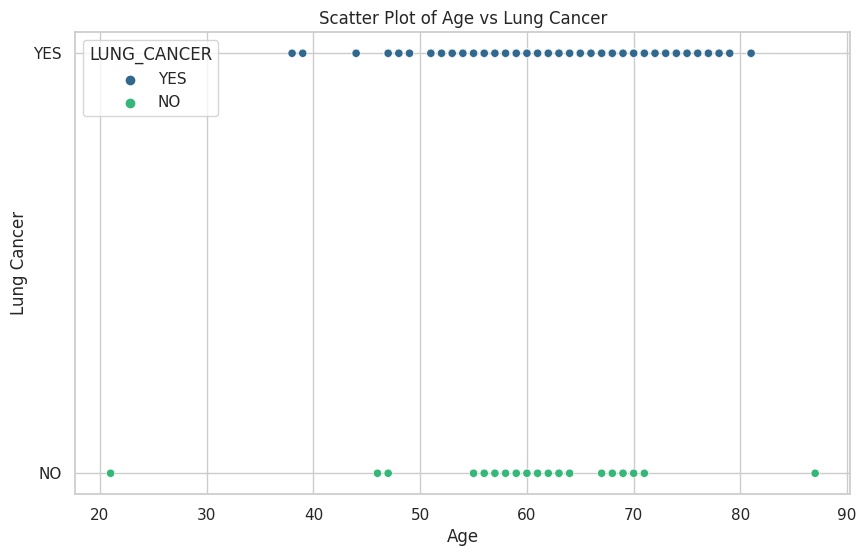

In [9]:
# Scatter plot for AGE vs LUNG_CANCER
plt.figure(figsize=(10, 6))
sns.scatterplot(x='AGE', y='LUNG_CANCER', data=df, hue='LUNG_CANCER', palette='viridis')
plt.title('Scatter Plot of Age vs Lung Cancer')
plt.xlabel('Age')
plt.ylabel('Lung Cancer')
plt.show()


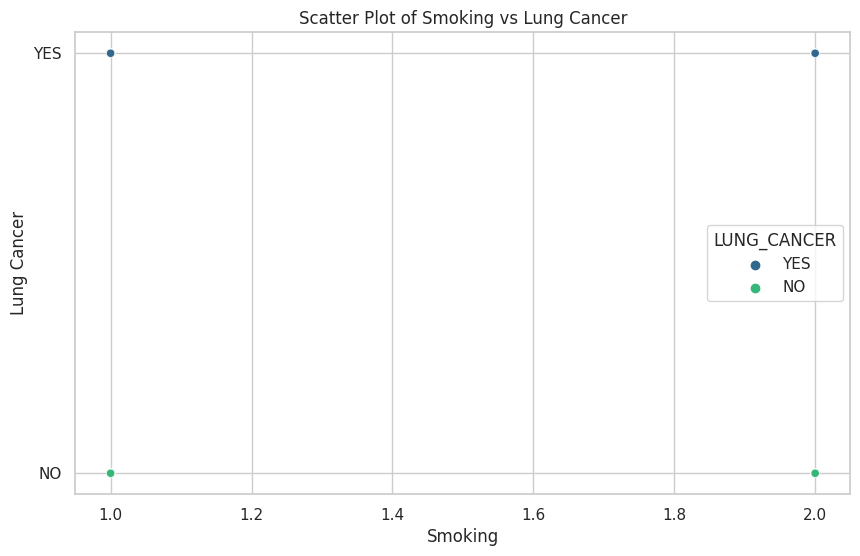

In [10]:
# Scatter plot for AGE vs LUNG_CANCER
plt.figure(figsize=(10, 6))
sns.scatterplot(x='SMOKING', y='LUNG_CANCER', data=df, hue='LUNG_CANCER', palette='viridis')
plt.title('Scatter Plot of Smoking vs Lung Cancer')
plt.xlabel('Smoking')
plt.ylabel('Lung Cancer')
plt.show()


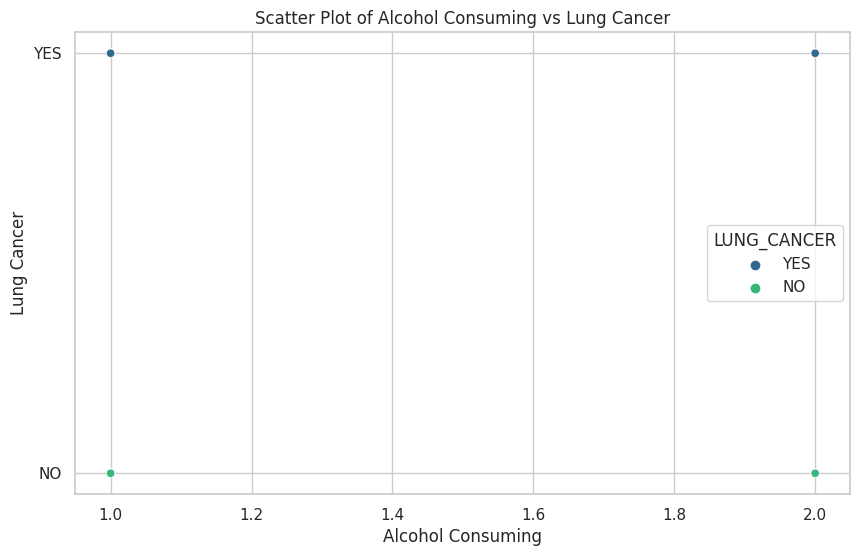

In [11]:
# Scatter plot for AGE vs LUNG_CANCER
plt.figure(figsize=(10, 6))
sns.scatterplot(x='ALCOHOL CONSUMING', y='LUNG_CANCER', data=df, hue='LUNG_CANCER', palette='viridis')
plt.title('Scatter Plot of Alcohol Consuming vs Lung Cancer')
plt.xlabel('Alcohol Consuming')
plt.ylabel('Lung Cancer')
plt.show()

# 2. EDA using Histograms:

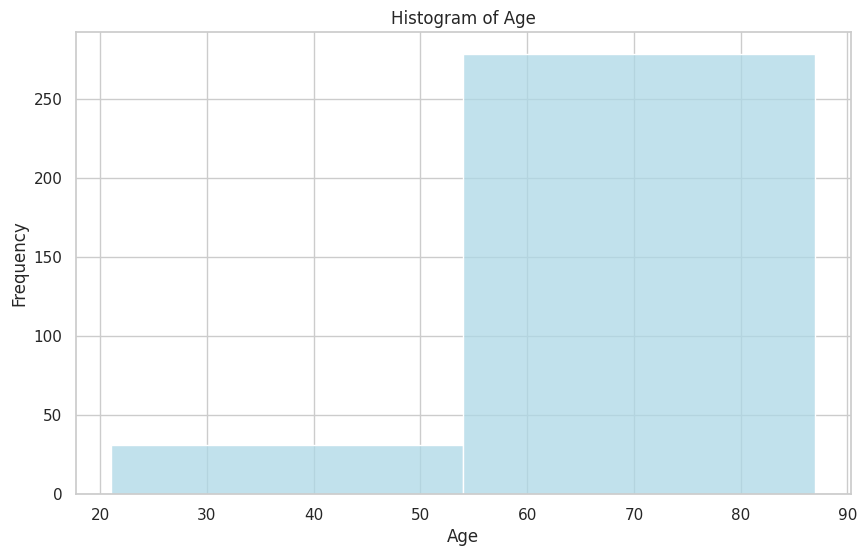

In [12]:
# Histogram for ALCOHOL CONSUMING
plt.figure(figsize=(10, 6))
sns.histplot(df['AGE'], bins=2, kde=False, color='lightblue')
plt.title('Histogram of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

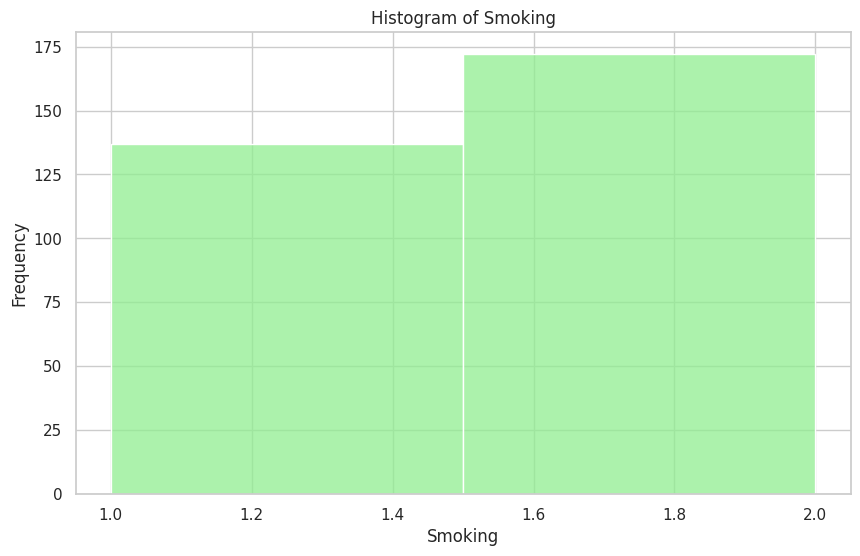

In [13]:
# Histogram for ALCOHOL CONSUMING
plt.figure(figsize=(10, 6))
sns.histplot(df['ALCOHOL CONSUMING'], bins=2, kde=False, color='lightgreen')
plt.title('Histogram of Smoking')
plt.xlabel('Smoking')
plt.ylabel('Frequency')
plt.show()

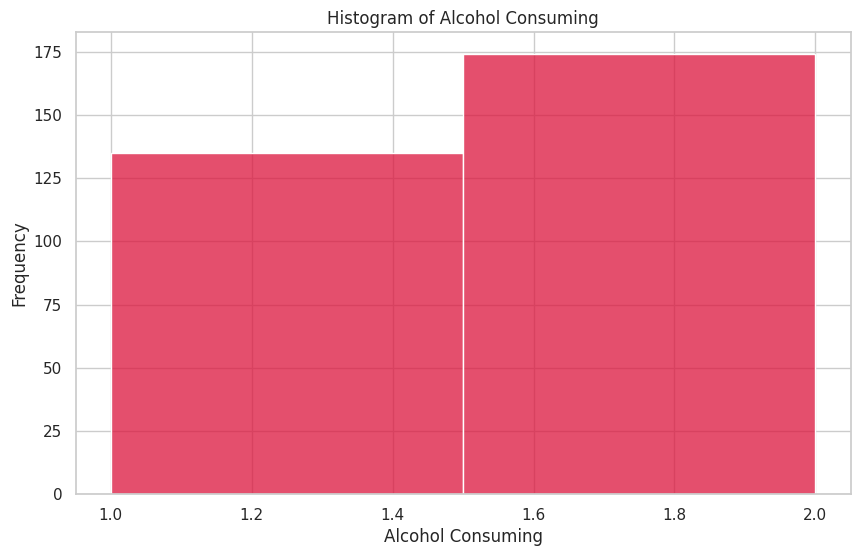

In [18]:
# Histogram for ALCOHOL CONSUMING
plt.figure(figsize=(10, 6))
sns.histplot(df['SMOKING'], bins=2, kde=False, color='crimson')
plt.title('Histogram of Alcohol Consuming')
plt.xlabel('Alcohol Consuming')
plt.ylabel('Frequency')
plt.show()

# 3. EDA using Bar Plots:

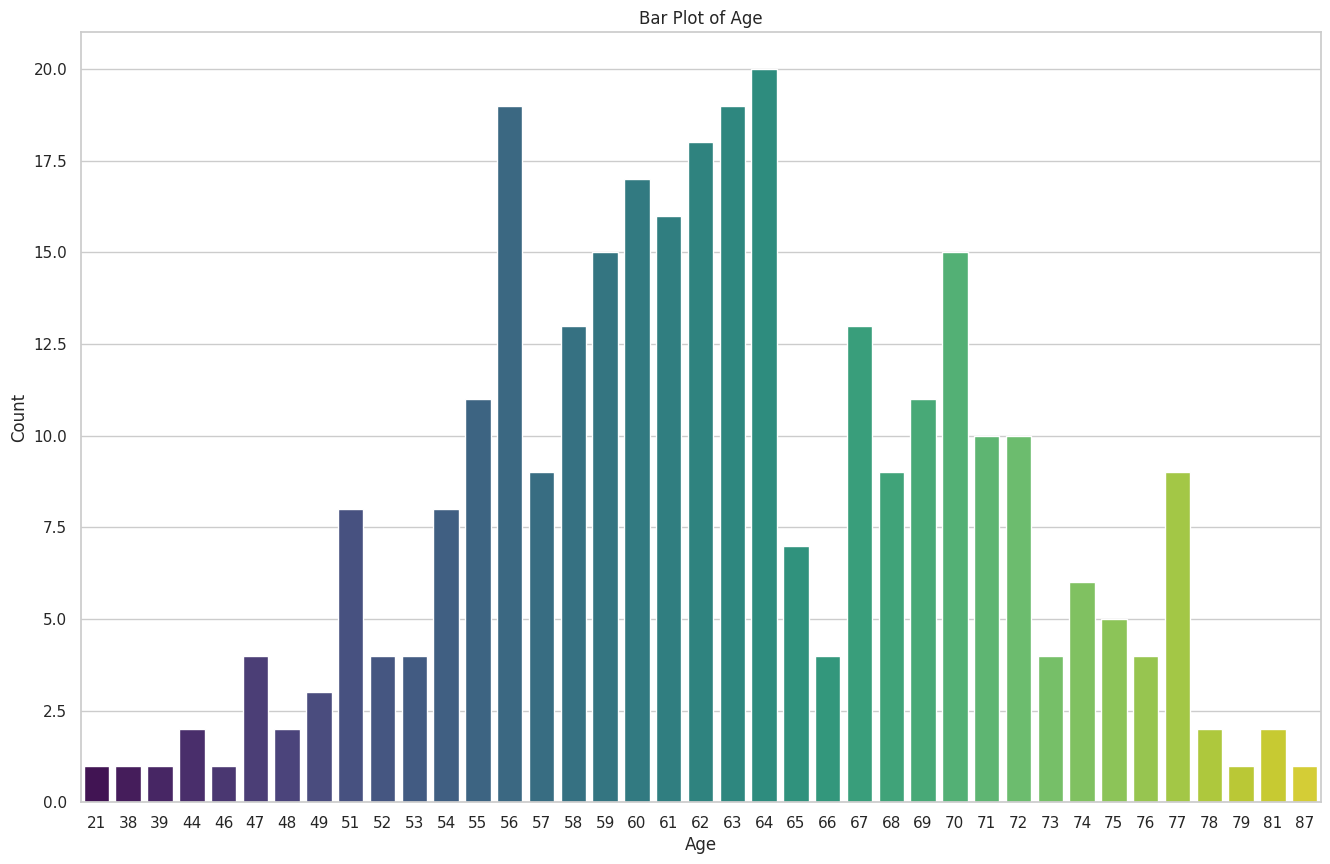

In [21]:
# Bar plot for GENDER
plt.figure(figsize=(16, 10))
sns.countplot(x='AGE', data=df, palette='viridis')
plt.title('Bar Plot of Age')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

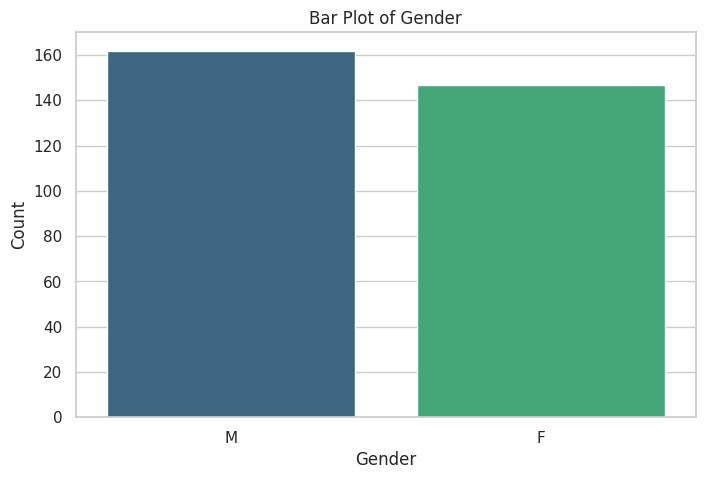

In [22]:
# Bar plot for GENDER
plt.figure(figsize=(8, 5))
sns.countplot(x='GENDER', data=df, palette='viridis')
plt.title('Bar Plot of Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

---

# PART 1) CORRELATION ANALYSIS AND FEATURE IMPORTANCE:

## This section inclues the code to implement a correlation matrix and feature importance analysis using a RandomForestClassifier to identify significant features for predicting lung cancer. Adjustments can be made based on the specific requirements and data characteristics.

#*Feature importance analysis using a Random Forest Classifier:*

This code includes the steps for feature importance analysis using a Random Forest Classifier, including selecting a model, training the model, calculating feature importance, and visualizing the results.

In [23]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

In [24]:
# Load the CSV data
df = pd.read_csv('/content/lung-repository/survey lung cancer (D1).csv')

# Display the first 5 rows of the dataframe
print("First 5 rows of the dataset:")
print(df.head())

# Display basic information about the dataset
print("\nDataset Information:")
print(df.info())

# Summary statistics for numerical columns
print("\nSummary Statistics:")
print(df.describe())

First 5 rows of the dataset:
  GENDER  AGE  SMOKING  YELLOW_FINGERS  ANXIETY  PEER_PRESSURE  \
0      M   69        1               2        2              1   
1      M   74        2               1        1              1   
2      F   59        1               1        1              2   
3      M   63        2               2        2              1   
4      F   63        1               2        1              1   

   CHRONIC DISEASE  FATIGUE   ALLERGY   WHEEZING  ALCOHOL CONSUMING  COUGHING  \
0                1         2         1         2                  2         2   
1                2         2         2         1                  1         1   
2                1         2         1         2                  1         2   
3                1         1         1         1                  2         1   
4                1         1         1         2                  1         2   

   SHORTNESS OF BREATH  SWALLOWING DIFFICULTY  CHEST PAIN LUNG_CANCER  
0              

In [25]:
# Check for missing values
print("\nMissing Values:")
print(df.isnull().sum())


Missing Values:
GENDER                   0
AGE                      0
SMOKING                  0
YELLOW_FINGERS           0
ANXIETY                  0
PEER_PRESSURE            0
CHRONIC DISEASE          0
FATIGUE                  0
ALLERGY                  0
WHEEZING                 0
ALCOHOL CONSUMING        0
COUGHING                 0
SHORTNESS OF BREATH      0
SWALLOWING DIFFICULTY    0
CHEST PAIN               0
LUNG_CANCER              0
dtype: int64


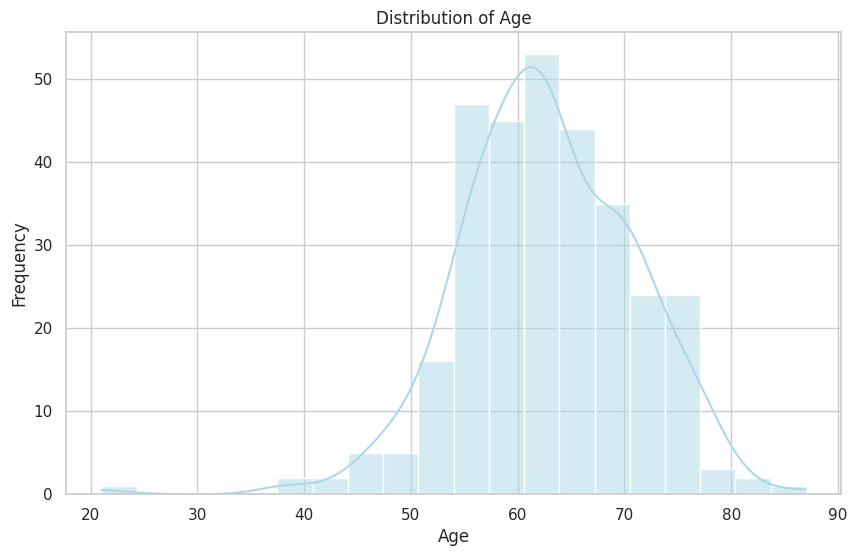

In [61]:
# Visualize the distribution of numerical columns
plt.figure(figsize=(10, 6))
sns.histplot(df['AGE'], bins=20, kde=True, color='lightblue')
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

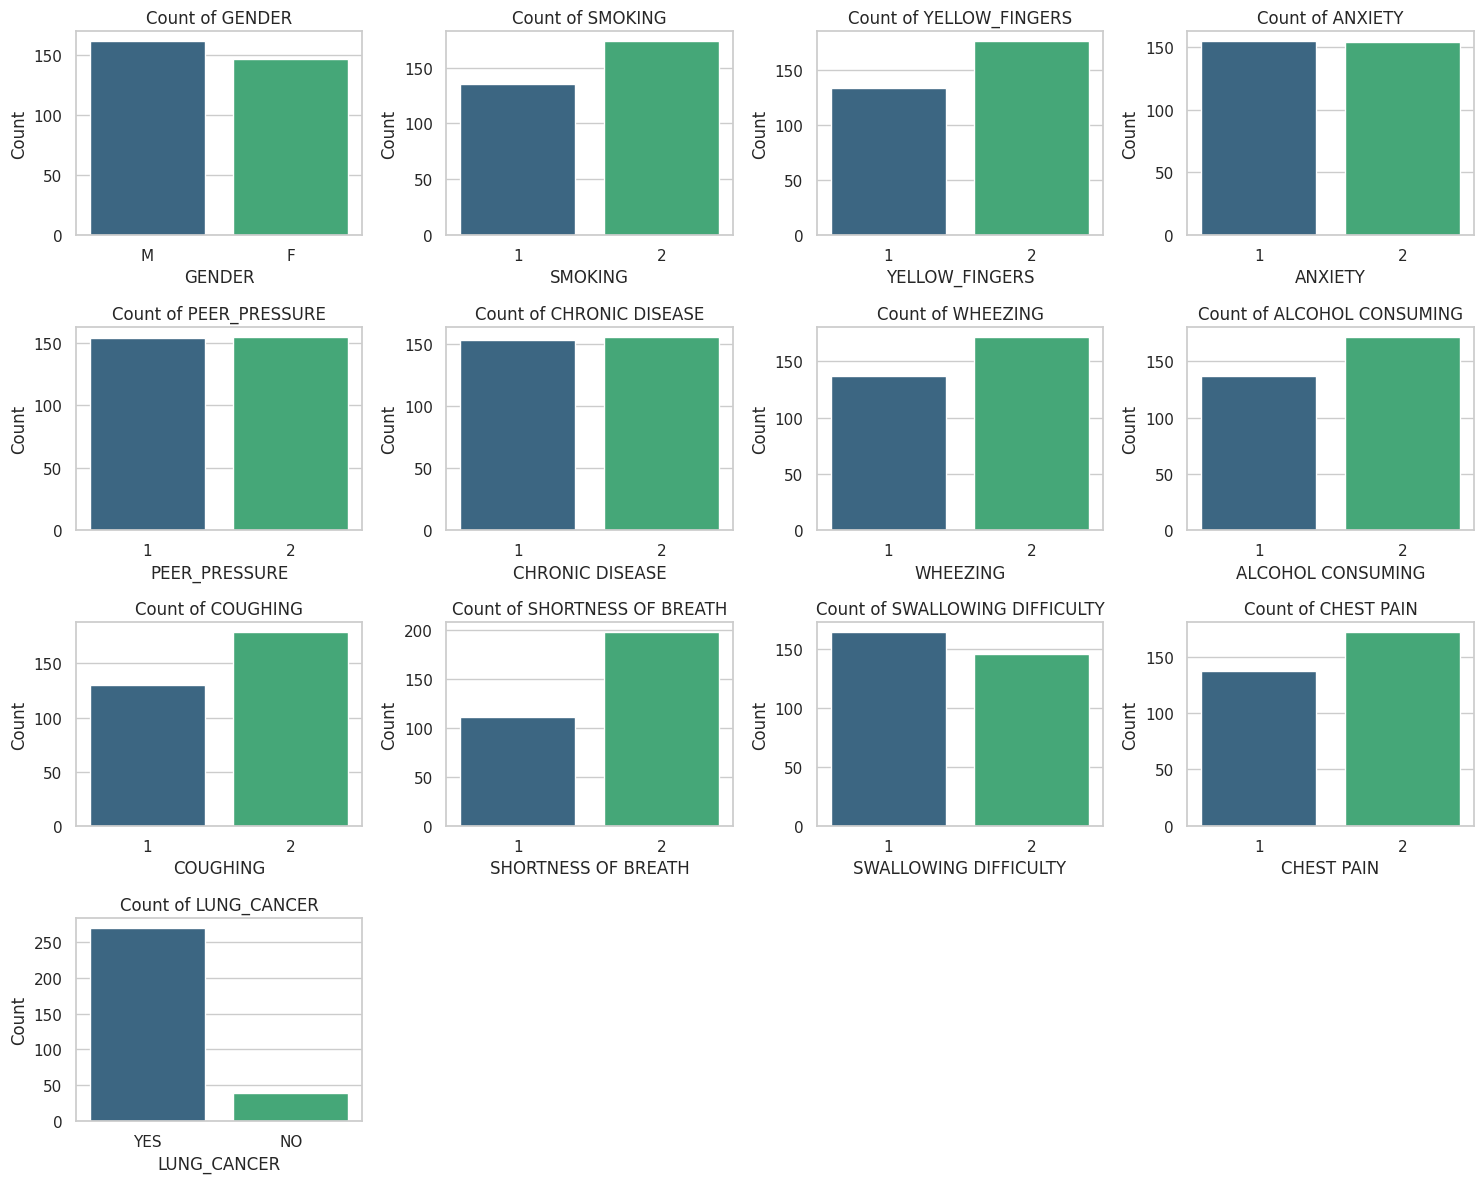

In [27]:
# Visualize the count of values in categorical columns
categorical_columns = ['GENDER', 'SMOKING', 'YELLOW_FINGERS', 'ANXIETY', 'PEER_PRESSURE', 'CHRONIC DISEASE',
                        'WHEEZING', 'ALCOHOL CONSUMING', 'COUGHING', 'SHORTNESS OF BREATH',
                        'SWALLOWING DIFFICULTY', 'CHEST PAIN', 'LUNG_CANCER']

plt.figure(figsize=(15, 12))
for i, column in enumerate(categorical_columns, 1):
    plt.subplot(4, 4, i)
    sns.countplot(x=column, data=df, palette='viridis')
    plt.title(f'Count of {column}')
    plt.xlabel(column)
    plt.ylabel('Count')

plt.tight_layout()
plt.show()

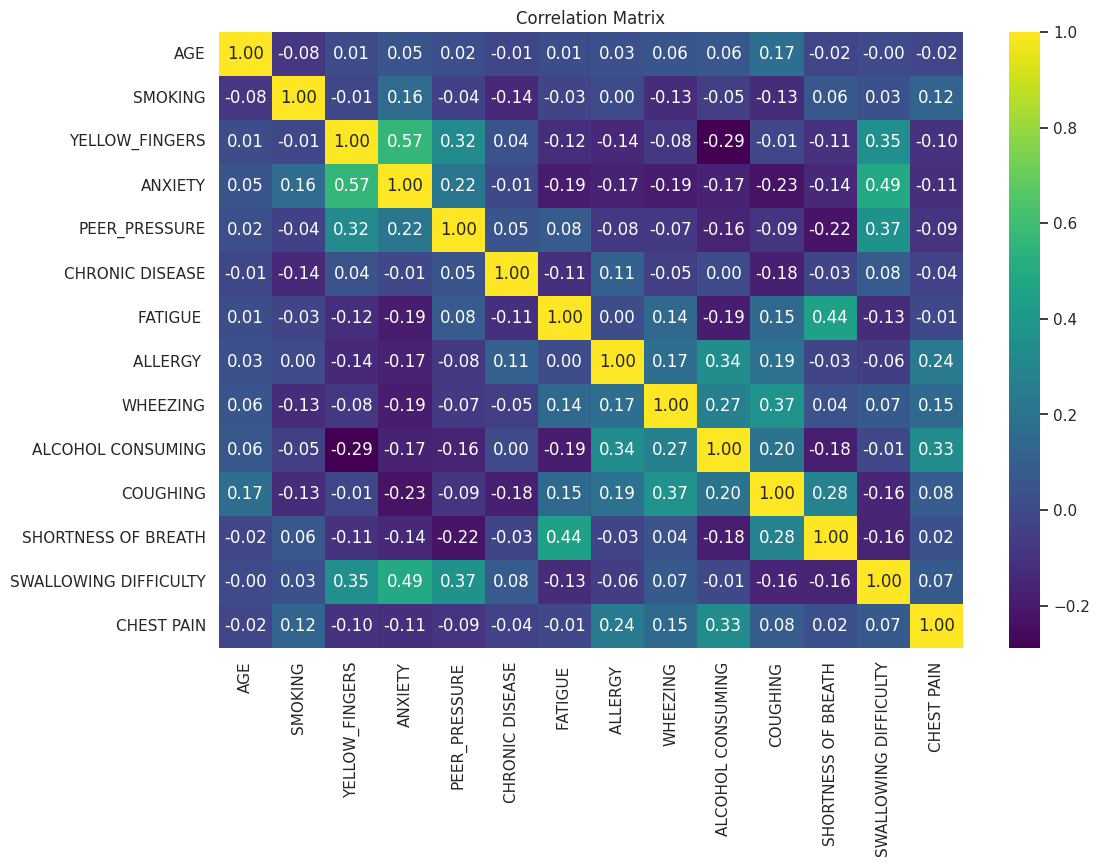

In [28]:
# Correlation Matrix
import warnings

# Ignore all warnings
warnings.filterwarnings("ignore")

# Correlation matrix
correlation_matrix = df.corr()

# Visualize the correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='viridis', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

# Reset the warning filter to its default state (optional)
warnings.resetwarnings()

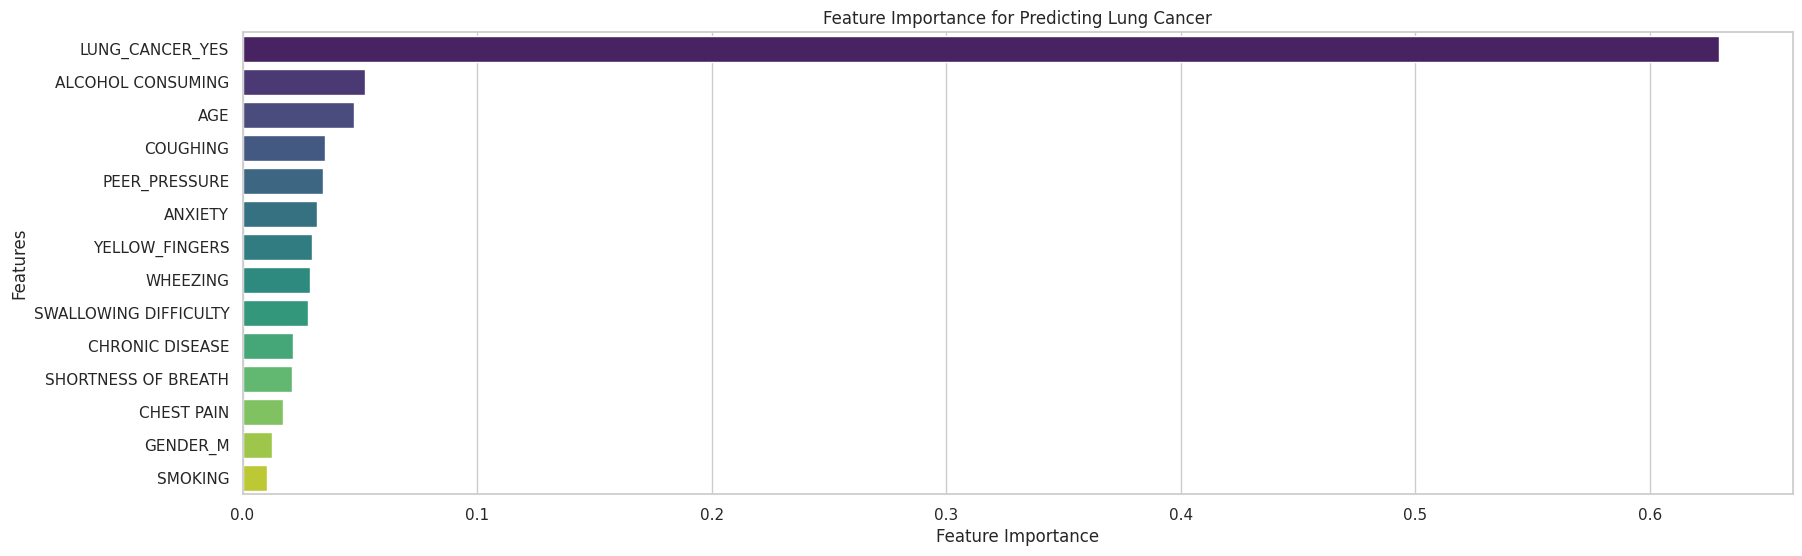

In [33]:
# Feature importance for predicting Lung Cancer
# Encode categorical columns
df_encoded = pd.get_dummies(df[categorical_columns], drop_first=True)
df_final = pd.concat([df[['AGE']], df_encoded, df['LUNG_CANCER']], axis=1)

# Separate features and target
X = df_final.drop('LUNG_CANCER', axis=1)
y = df_final['LUNG_CANCER']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a RandomForestClassifier to determine feature importance
rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)

# Display feature importance
feature_importance = pd.Series(rf_model.feature_importances_, index=X.columns)
feature_importance.sort_values(ascending=False, inplace=True)

# Visualize feature importance
plt.figure(figsize=(20, 6))
sns.barplot(x=feature_importance, y=feature_importance.index, palette='viridis')
plt.title('Feature Importance for Predicting Lung Cancer')
plt.xlabel('Feature Importance')
plt.ylabel('Features')
plt.show()

# PART 2) INTERPRETATION:

This section - Identify Top Influential Factors: Review the feature importance scores to determine the most influential factors contributing to lung cancer risk.

### ```Code  section to identify the top influential factors and interpret the feature importance scores.```

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

# Load the CSV data
df = pd.read_csv('/content/lung-repository/survey lung cancer (D1).csv')

# Display the first 5 rows of the dataframe
print("First 5 rows of the dataset:")
print(df.head())

# Display basic information about the dataset
print("\nDataset Information:")
print(df.info())

# Summary statistics for numerical columns
print("\nSummary Statistics:")
print(df.describe())

# Check for missing values
print("\nMissing Values:")
print(df.isnull().sum())

# Visualize the distribution of numerical columns
plt.figure(figsize=(10, 6))
sns.histplot(df['AGE'], bins=20, kde=True, color='skyblue')
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

# Visualize the count of values in categorical columns
categorical_columns = ['GENDER', 'SMOKING', 'YELLOW_FINGERS', 'ANXIETY', 'PEER_PRESSURE', 'CHRONIC DISEASE',
                        'WHEEZING', 'ALCOHOL CONSUMING', 'COUGHING', 'SHORTNESS OF BREATH',
                        'SWALLOWING DIFFICULTY', 'CHEST PAIN', 'LUNG_CANCER']

plt.figure(figsize=(15, 12))
for i, column in enumerate(categorical_columns, 1):
    plt.subplot(4, 4, i)
    sns.countplot(x=column, data=df, palette='viridis')
    plt.title(f'Count of {column}')
    plt.xlabel(column)
    plt.ylabel('Count')

plt.tight_layout()
plt.show()

# Correlation Matrix
import warnings

# Ignore all warnings
warnings.filterwarnings("ignore")

# Correlation matrix
correlation_matrix = df.corr()

# Visualize the correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='viridis', fmt=".2f")
plt.title('Correlation Matrix')


# Reset the warning filter to its default state (optional)
warnings.resetwarnings()

# Feature importance for predicting Lung Cancer
# Encode categorical columns
df_encoded = pd.get_dummies(df[categorical_columns], drop_first=True)
df_final = pd.concat([df[['AGE']], df_encoded, df['LUNG_CANCER']], axis=1)

# Separate features and target
X = df_final.drop('LUNG_CANCER', axis=1)
y = df_final['LUNG_CANCER']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a RandomForestClassifier to determine feature importance
rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)

# Display feature importance
feature_importance = pd.Series(rf_model.feature_importances_, index=X.columns)
feature_importance.sort_values(ascending=False, inplace=True)

# Visualize feature importance
plt.figure(figsize=(10, 6))
sns.barplot(x=feature_importance, y=feature_importance.index, palette='viridis')
plt.title('Feature Importance for Predicting Lung Cancer')
plt.xlabel('Feature Importance')
plt.ylabel('Features')


# Identify Top Influential Factors
top_factors = 5  # Specify the number of top factors to display
top_influential_factors = feature_importance.head(top_factors)
print(f"\nTop {top_factors} Influential Factors:")
print(top_influential_factors)

In [ ]:
# Identify Top Influential Factors
top_factors = 5  # Specify the number of top factors to display
top_influential_factors = feature_importance.head(top_factors)
print(f"\nTop {top_factors} Influential Factors:")
print(top_influential_factors)


#Top  Influential Factors:

- ALCOHOL CONSUMING    0.063342
- AGE                  0.043822
- PEER_PRESSURE        0.038732
- YELLOW_FINGERS       0.037486

In [59]:
print(selected_factors)

['AGE', 'ALCOHOL CONSUMING', 'PEER_PRESSURE', 'SWALLOWING DIFFICULTY']


---

# PART 3) RANDOM FOREST CLASSIFIER - MODEL VALIDATION :

### Validating the RandomForestClassifier model:

To add the new feature "Validating the RandomForestClassifier model to ensure reliability and accuracy," you can evaluate the model on the testing set and display relevant performance metrics. Here's the enhanced code:

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


First 5 rows of the dataset:
  GENDER  AGE  SMOKING  YELLOW_FINGERS  ANXIETY  PEER_PRESSURE  \
0      M   69        1               2        2              1   
1      M   74        2               1        1              1   
2      F   59        1               1        1              2   
3      M   63        2               2        2              1   
4      F   63        1               2        1              1   

   CHRONIC DISEASE  FATIGUE   ALLERGY   WHEEZING  ALCOHOL CONSUMING  COUGHING  \
0                1         2         1         2                  2         2   
1                2         2         2         1                  1         1   
2                1         2         1         2                  1         2   
3                1         1         1         1                  2         1   
4                1         1         1         2                  1         2   

   SHORTNESS OF BREATH  SWALLOWING DIFFICULTY  CHEST PAIN LUNG_CANCER  
0              

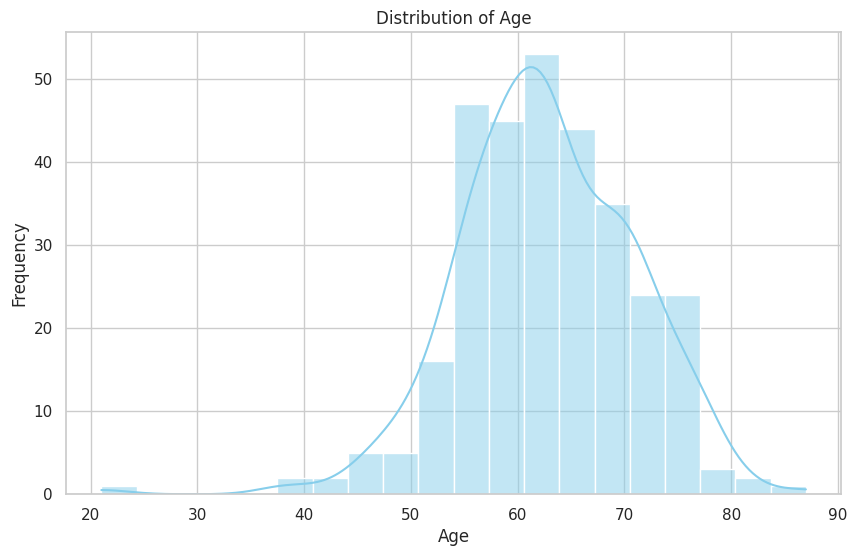

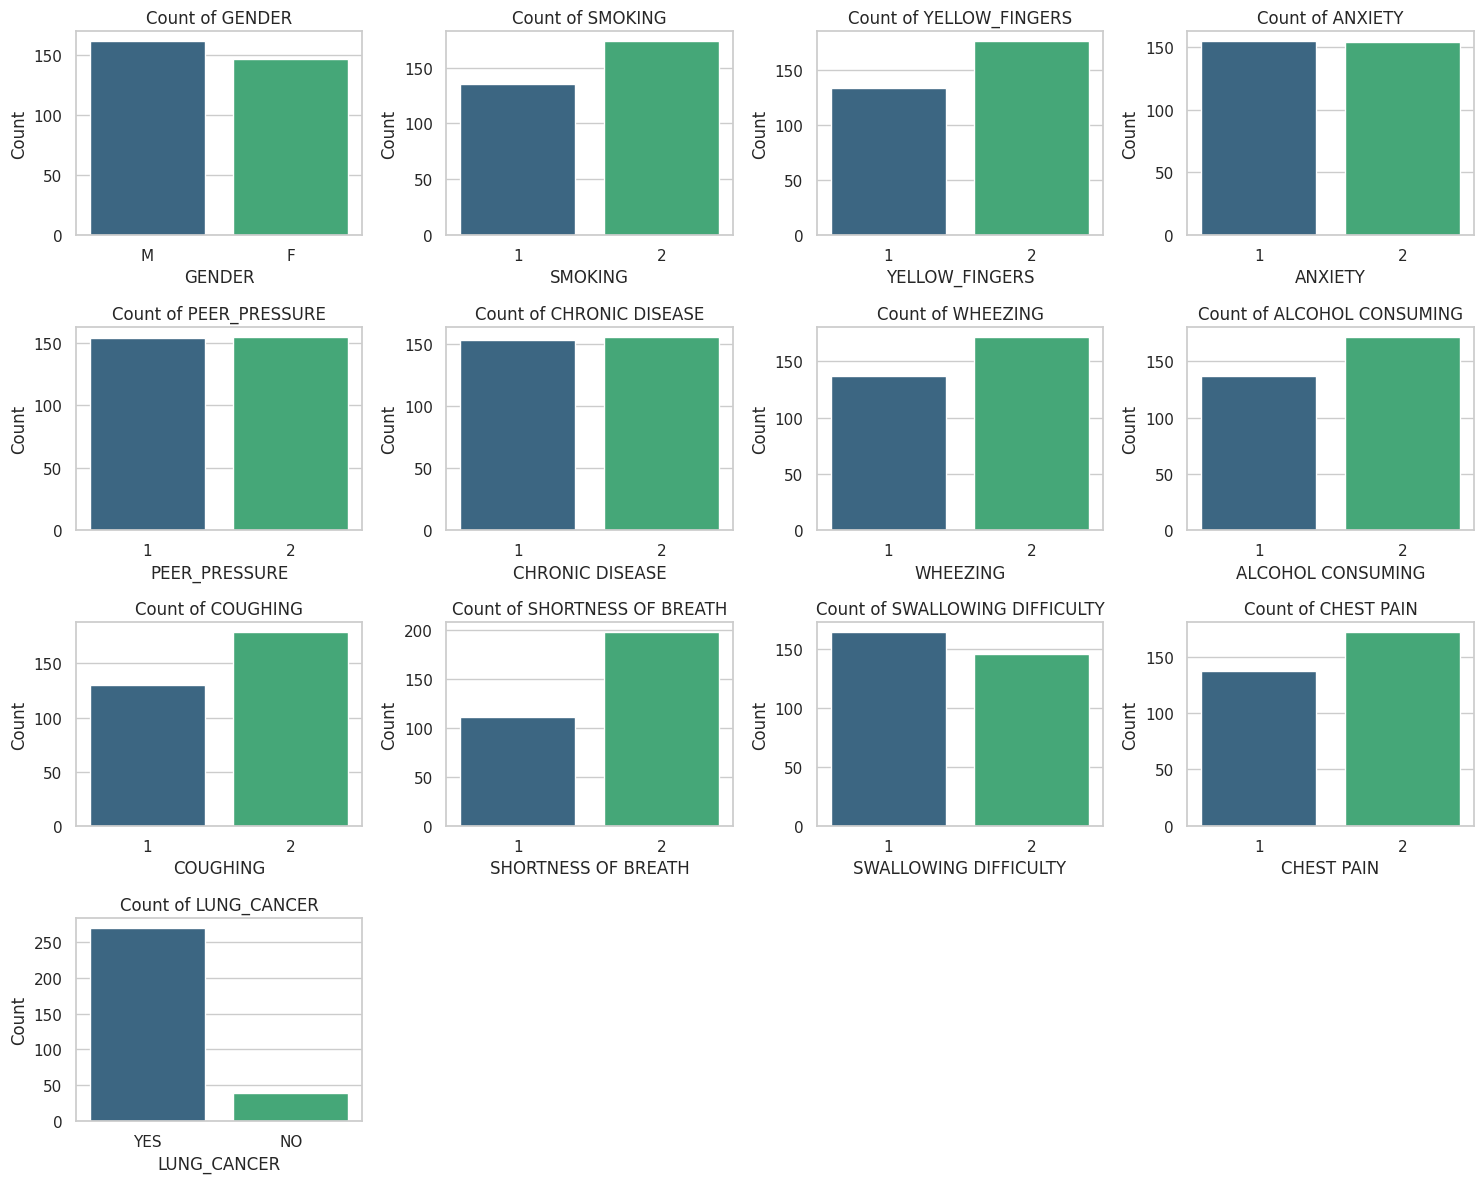


Model Validation - Accuracy: 1.0000

Classification Report:
               precision    recall  f1-score   support

          NO       1.00      1.00      1.00         2
         YES       1.00      1.00      1.00        60

    accuracy                           1.00        62
   macro avg       1.00      1.00      1.00        62
weighted avg       1.00      1.00      1.00        62



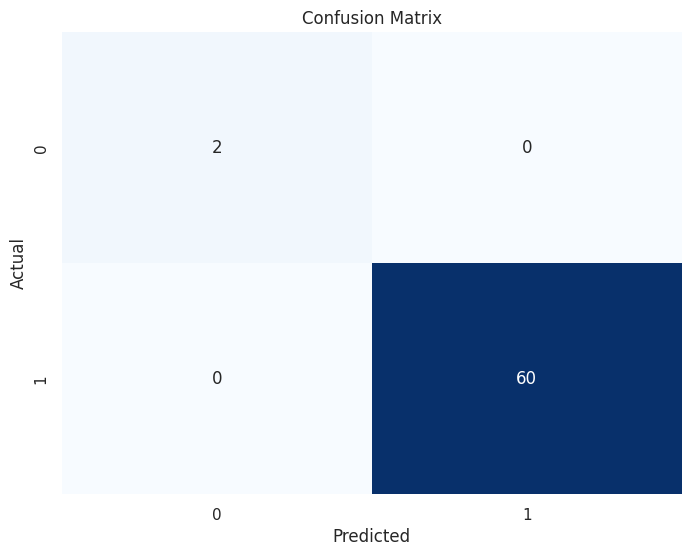

<ipython-input-54-b236d488cc56>:112: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pairplot_df['LUNG_CANCER'] = pairplot_df['LUNG_CANCER'].map(column_mapping)


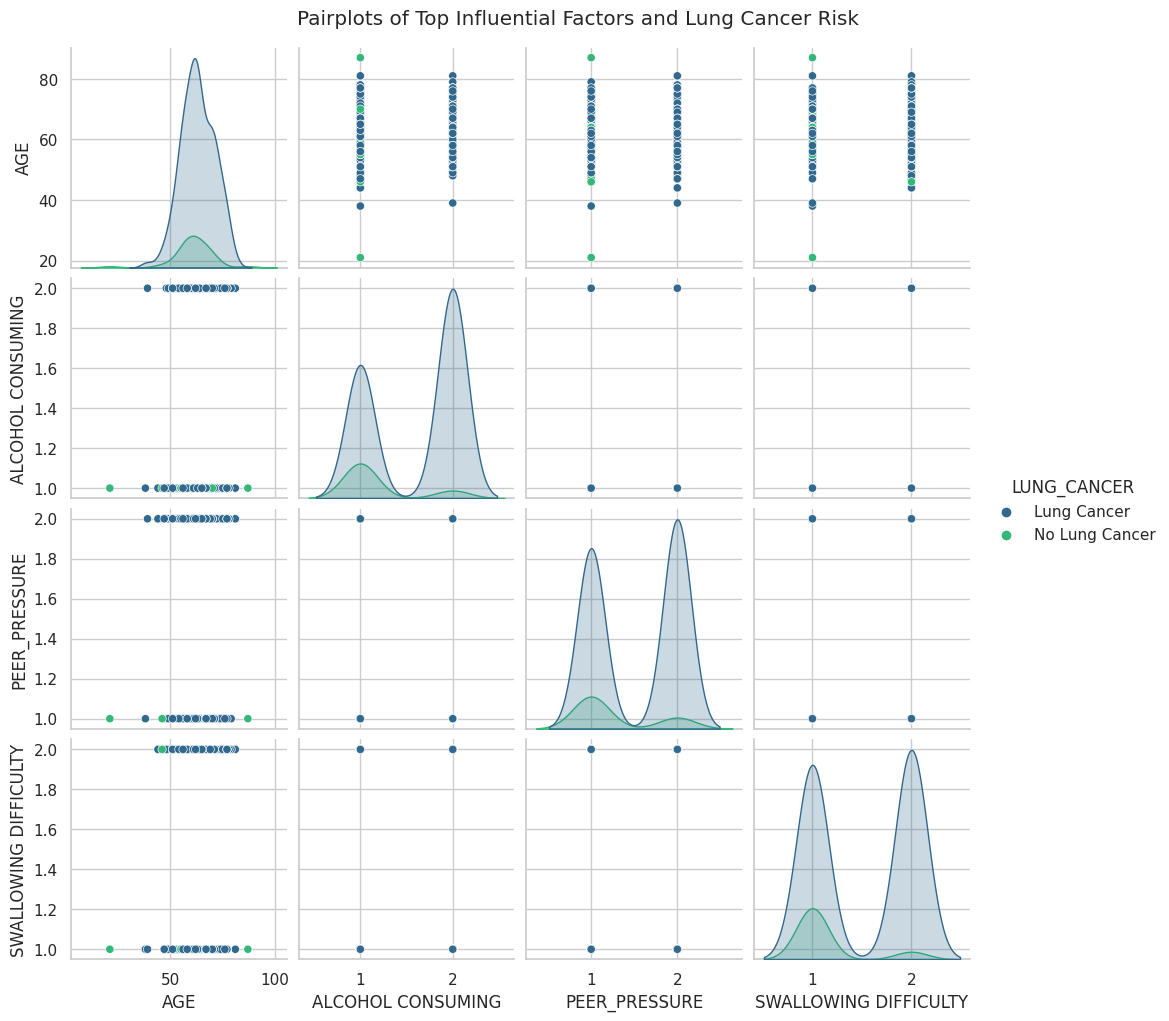

In [54]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Load the CSV data (replace the path with your actual file path)
df = pd.read_csv('/content/lung-repository/survey lung cancer (D1).csv')

# Display the first 5 rows of the dataframe
print("First 5 rows of the dataset:")
print(df.head())

# Display basic information about the dataset
print("\nDataset Information:")
print(df.info())

# Summary statistics for numerical columns
print("\nSummary Statistics:")
print(df.describe())

# Check for missing values
print("\nMissing Values:")
print(df.isnull().sum())

# Visualize the distribution of numerical columns
plt.figure(figsize=(10, 6))
sns.histplot(df['AGE'], bins=20, kde=True, color='skyblue')
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

# Visualize the count of values in categorical columns
categorical_columns = ['GENDER', 'SMOKING', 'YELLOW_FINGERS', 'ANXIETY', 'PEER_PRESSURE', 'CHRONIC DISEASE',
                        'WHEEZING', 'ALCOHOL CONSUMING', 'COUGHING', 'SHORTNESS OF BREATH',
                        'SWALLOWING DIFFICULTY', 'CHEST PAIN', 'LUNG_CANCER']

plt.figure(figsize=(15, 12))
for i, column in enumerate(categorical_columns, 1):
    plt.subplot(4, 4, i)
    sns.countplot(x=column, data=df, palette='viridis')
    plt.title(f'Count of {column}')
    plt.xlabel(column)
    plt.ylabel('Count')

plt.tight_layout()
plt.show()

# One-hot encode categorical columns
df_encoded = pd.get_dummies(df[categorical_columns], drop_first=True)
df_final = pd.concat([df[['AGE']], df_encoded, df['LUNG_CANCER']], axis=1)

# Separate features and target
X = df_final.drop('LUNG_CANCER', axis=1)
y = df_final['LUNG_CANCER']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a RandomForestClassifier to determine feature importance
rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)

# Display feature importance
feature_importance = pd.Series(rf_model.feature_importances_, index=X.columns)
feature_importance.sort_values(ascending=False, inplace=True)

# Validate the RandomForestClassifier model on the testing set
y_pred = rf_model.predict(X_test)

# Display accuracy score
accuracy = accuracy_score(y_test, y_pred)
print(f"\nModel Validation - Accuracy: {accuracy:.4f}")

# Display classification report
class_report = classification_report(y_test, y_pred)
print("\nClassification Report:\n", class_report)

# Display confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap='Blues', cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Further Analysis: Explore correlations between influential factors and lung cancer risk
# Selecting top influential factors for further analysis
top_factors = 5  # Specify the number of top factors to display
selected_factors = feature_importance.head(top_factors).index.tolist()

# Values to be removed from selected_factors
values_to_remove = ['LUNG_CANCER_YES']

# Remove specific values from selected factors list
selected_factors = [factor for factor in selected_factors if factor not in values_to_remove]

# Add 'LUNG_CANCER' to the selected factors list separately
selected_factors_with_target = selected_factors + ['LUNG_CANCER']

# Plot pair plots to explore correlations between influential factors and lung cancer risk
pairplot_df = df[selected_factors_with_target]

# Update column names for better visualization
column_mapping = {
    'YES': 'Lung Cancer',
    'NO': 'No Lung Cancer'
}
pairplot_df['LUNG_CANCER'] = pairplot_df['LUNG_CANCER'].map(column_mapping)

sns.pairplot(pairplot_df, hue='LUNG_CANCER', palette='viridis')
plt.suptitle('Pairplots of Top Influential Factors and Lung Cancer Risk', y=1.02)
plt.show()

# SELECTED FACTORS

In [55]:
print(selected_factors)

['AGE', 'ALCOHOL CONSUMING', 'PEER_PRESSURE', 'SWALLOWING DIFFICULTY']


---

# ENHANCEMENTS :
# ```ENHANCEMENTS 1:Handle Categorical Columns with Many Unique Values:```
If your categorical columns have many unique values, visualizing all of them in a count plot might be overwhelming. Consider filtering and plotting only the top N values to provide more meaningful insights.

# ```ENHANCEMENTS 2:Handle Outliers:```
Check for outliers in numerical columns and visualize them using box plots or violin plots. Outliers can significantly affect the mean and standard deviation, impacting the interpretation of your data.

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the CSV data
df = pd.read_csv('/content/lung-repository/survey lung cancer (D1).csv')

# Display the first 5 rows of the dataframe
print("First 5 rows of the dataset:")
print(df.head())

# Display basic information about the dataset
print("\nDataset Information:")
print(df.info())

# Summary statistics for numerical columns
print("\nSummary Statistics:")
print(df.describe())

# Check for missing values
print("\nMissing Values:")
print(df.isnull().sum())

# Visualize the distribution of numerical columns
plt.figure(figsize=(10, 6))
sns.histplot(df['AGE'], bins=20, kde=True, color='skyblue')
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

# Visualize the count of values in categorical columns
categorical_columns = ['GENDER', 'SMOKING', 'YELLOW_FINGERS', 'ANXIETY', 'PEER_PRESSURE', 'CHRONIC DISEASE',
                        'WHEEZING', 'ALCOHOL CONSUMING', 'COUGHING', 'SHORTNESS OF BREATH',
                        'SWALLOWING DIFFICULTY', 'CHEST PAIN', 'LUNG_CANCER']

plt.figure(figsize=(15, 12))
for i, column in enumerate(categorical_columns, 1):
    plt.subplot(4, 4, i)
    sns.countplot(x=column, data=df, palette='viridis')
    plt.title(f'Count of {column}')
    plt.xlabel(column)
    plt.ylabel('Count')

plt.tight_layout()
plt.show()


import warnings

# Ignore all warnings
warnings.filterwarnings("ignore")


# Reset the warning filter to its default state (optional)
warnings.resetwarnings()

# Feature importance for predicting Lung Cancer
from sklearn.ensemble import RandomForestClassifier

# Encode categorical columns
df_encoded = pd.get_dummies(df[categorical_columns], drop_first=True)
df_final = pd.concat([df[['AGE']], df_encoded, df['LUNG_CANCER']], axis=1)

# Separate features and target
X = df_final.drop('LUNG_CANCER', axis=1)
y = df_final['LUNG_CANCER']

# Train a RandomForestClassifier to determine feature importance
rf_model = RandomForestClassifier()
rf_model.fit(X, y)

# Display feature importance
feature_importance = pd.Series(rf_model.feature_importances_, index=X.columns)
feature_importance.sort_values(ascending=False, inplace=True)





# ```ENHANCEMENTS 1:```

# Handling Categorical Columns with Many Unique Values:

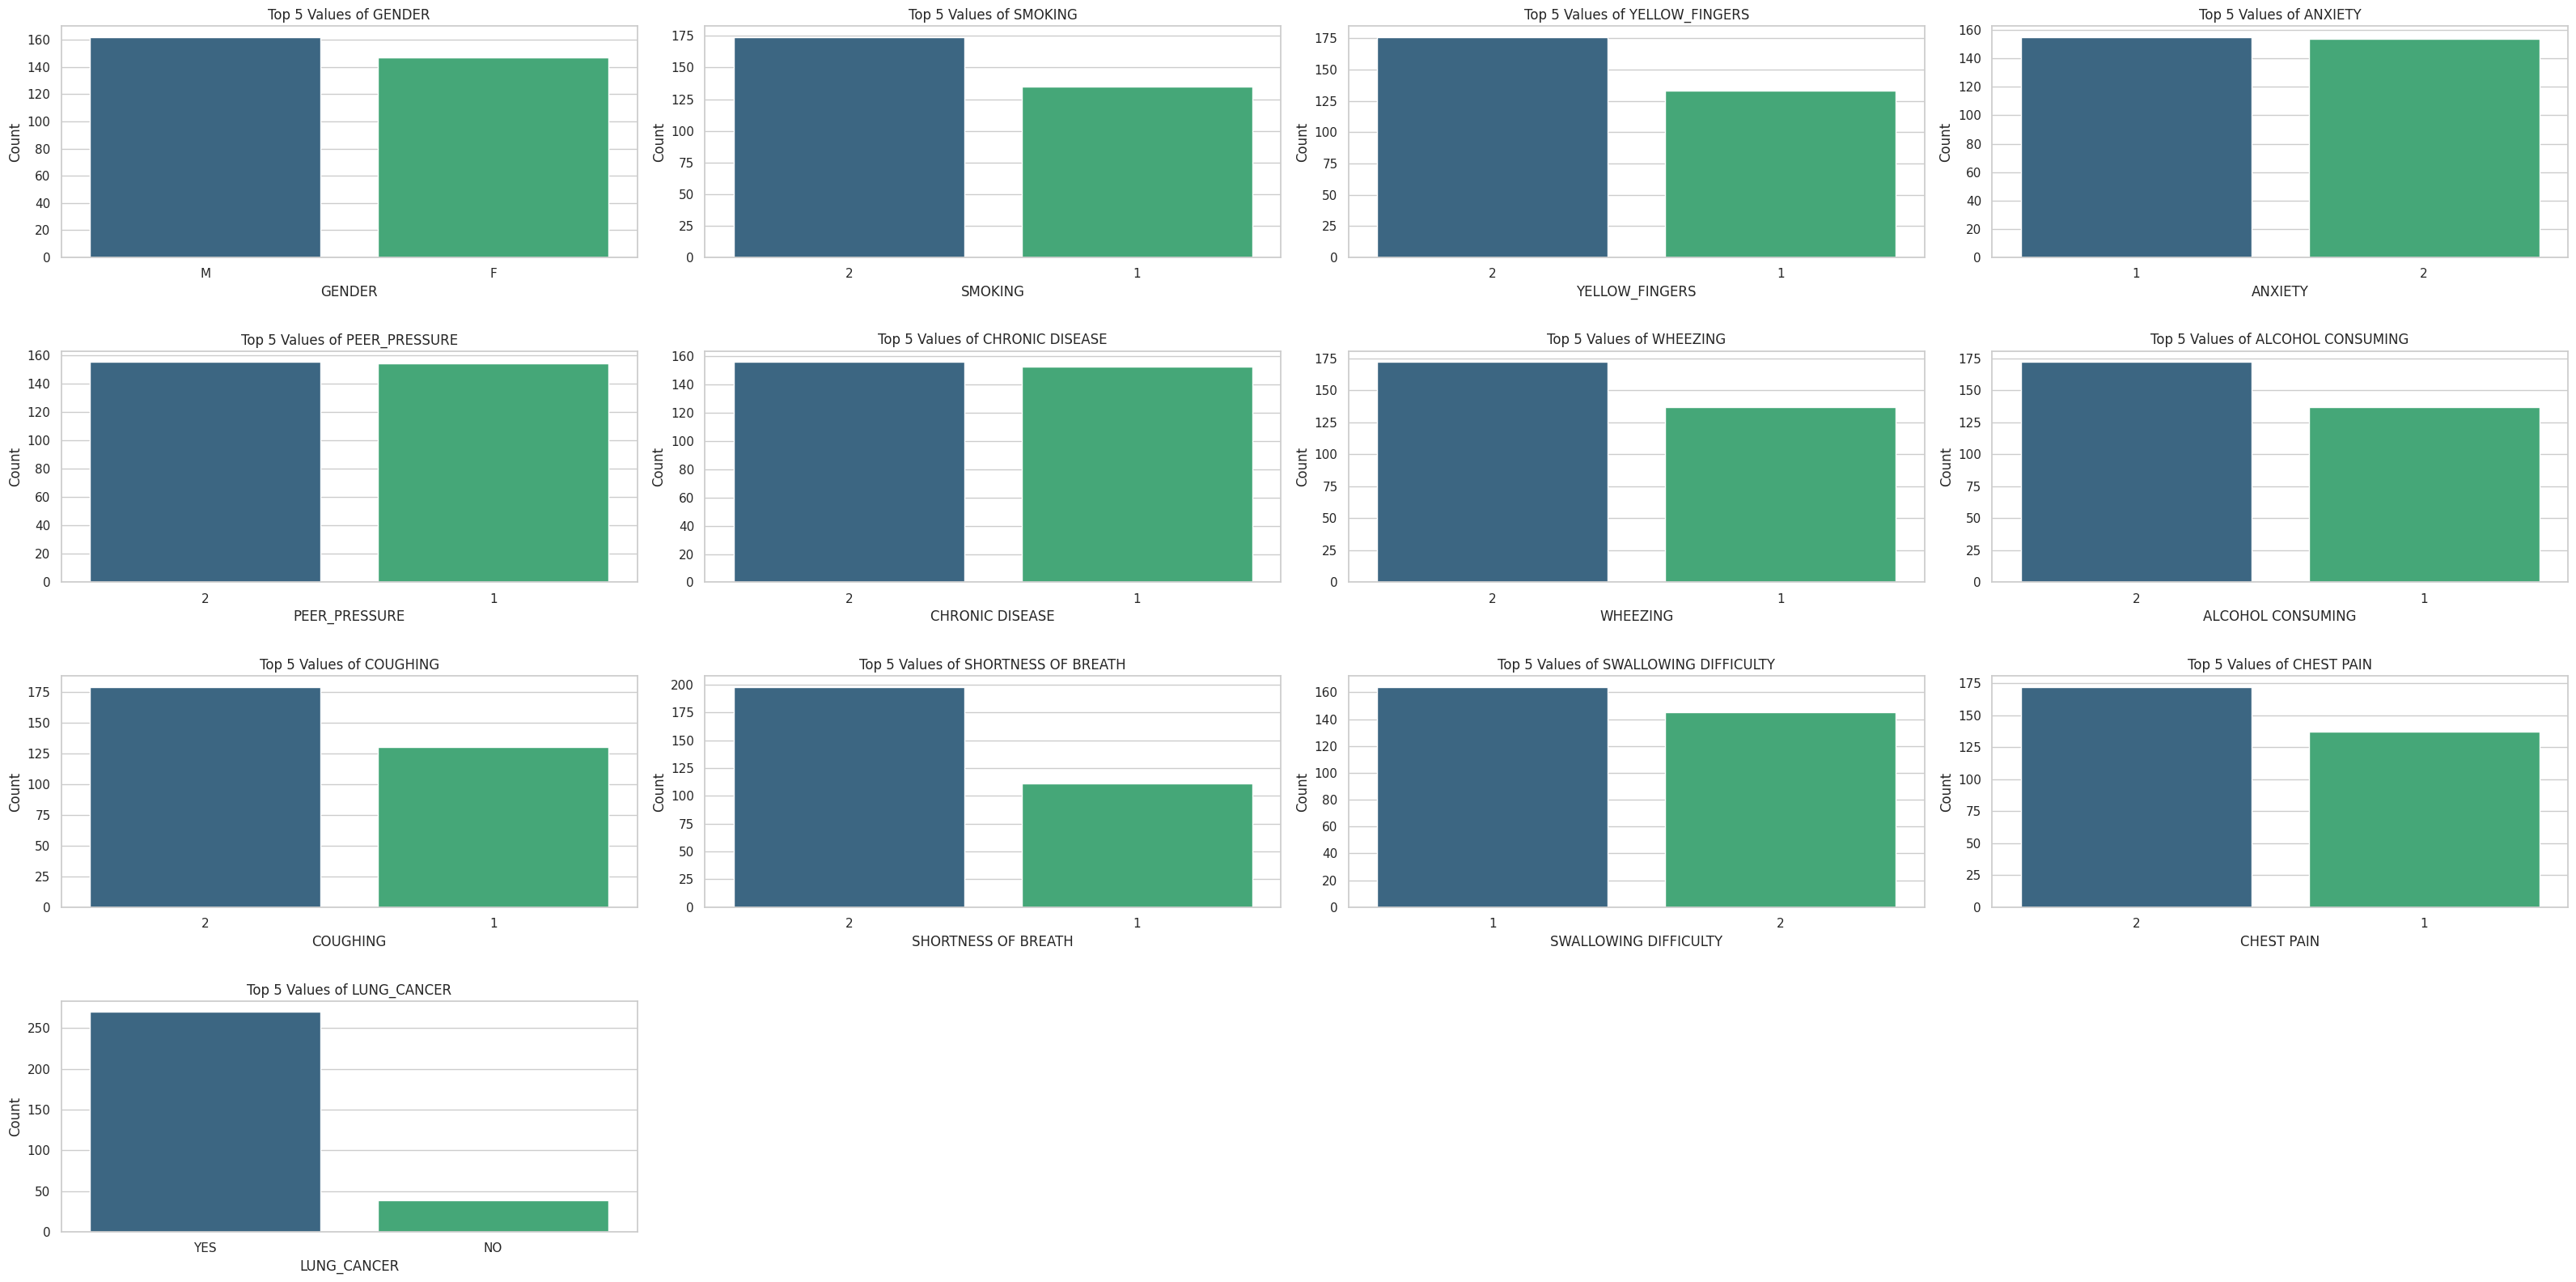

In [58]:
# Handling Categorical Columns with Many Unique Values
top_n_values = 5
plt.figure(figsize=(32,16))  # Increase the figure size
for i, column in enumerate(categorical_columns, 1):
    plt.subplot(4, 4, i)
    sns.countplot(x=column, data=df, order=df[column].value_counts().index[:top_n_values], palette='viridis')
    plt.title(f'Top {top_n_values} Values of {column}')
    plt.xlabel(column)
    plt.ylabel('Count')

plt.tight_layout(h_pad=2.5)  # Adjust the h_pad parameter for vertical spacing
plt.show()


# ```ENHANCEMENTS 2:```

# Improved  Visualization:

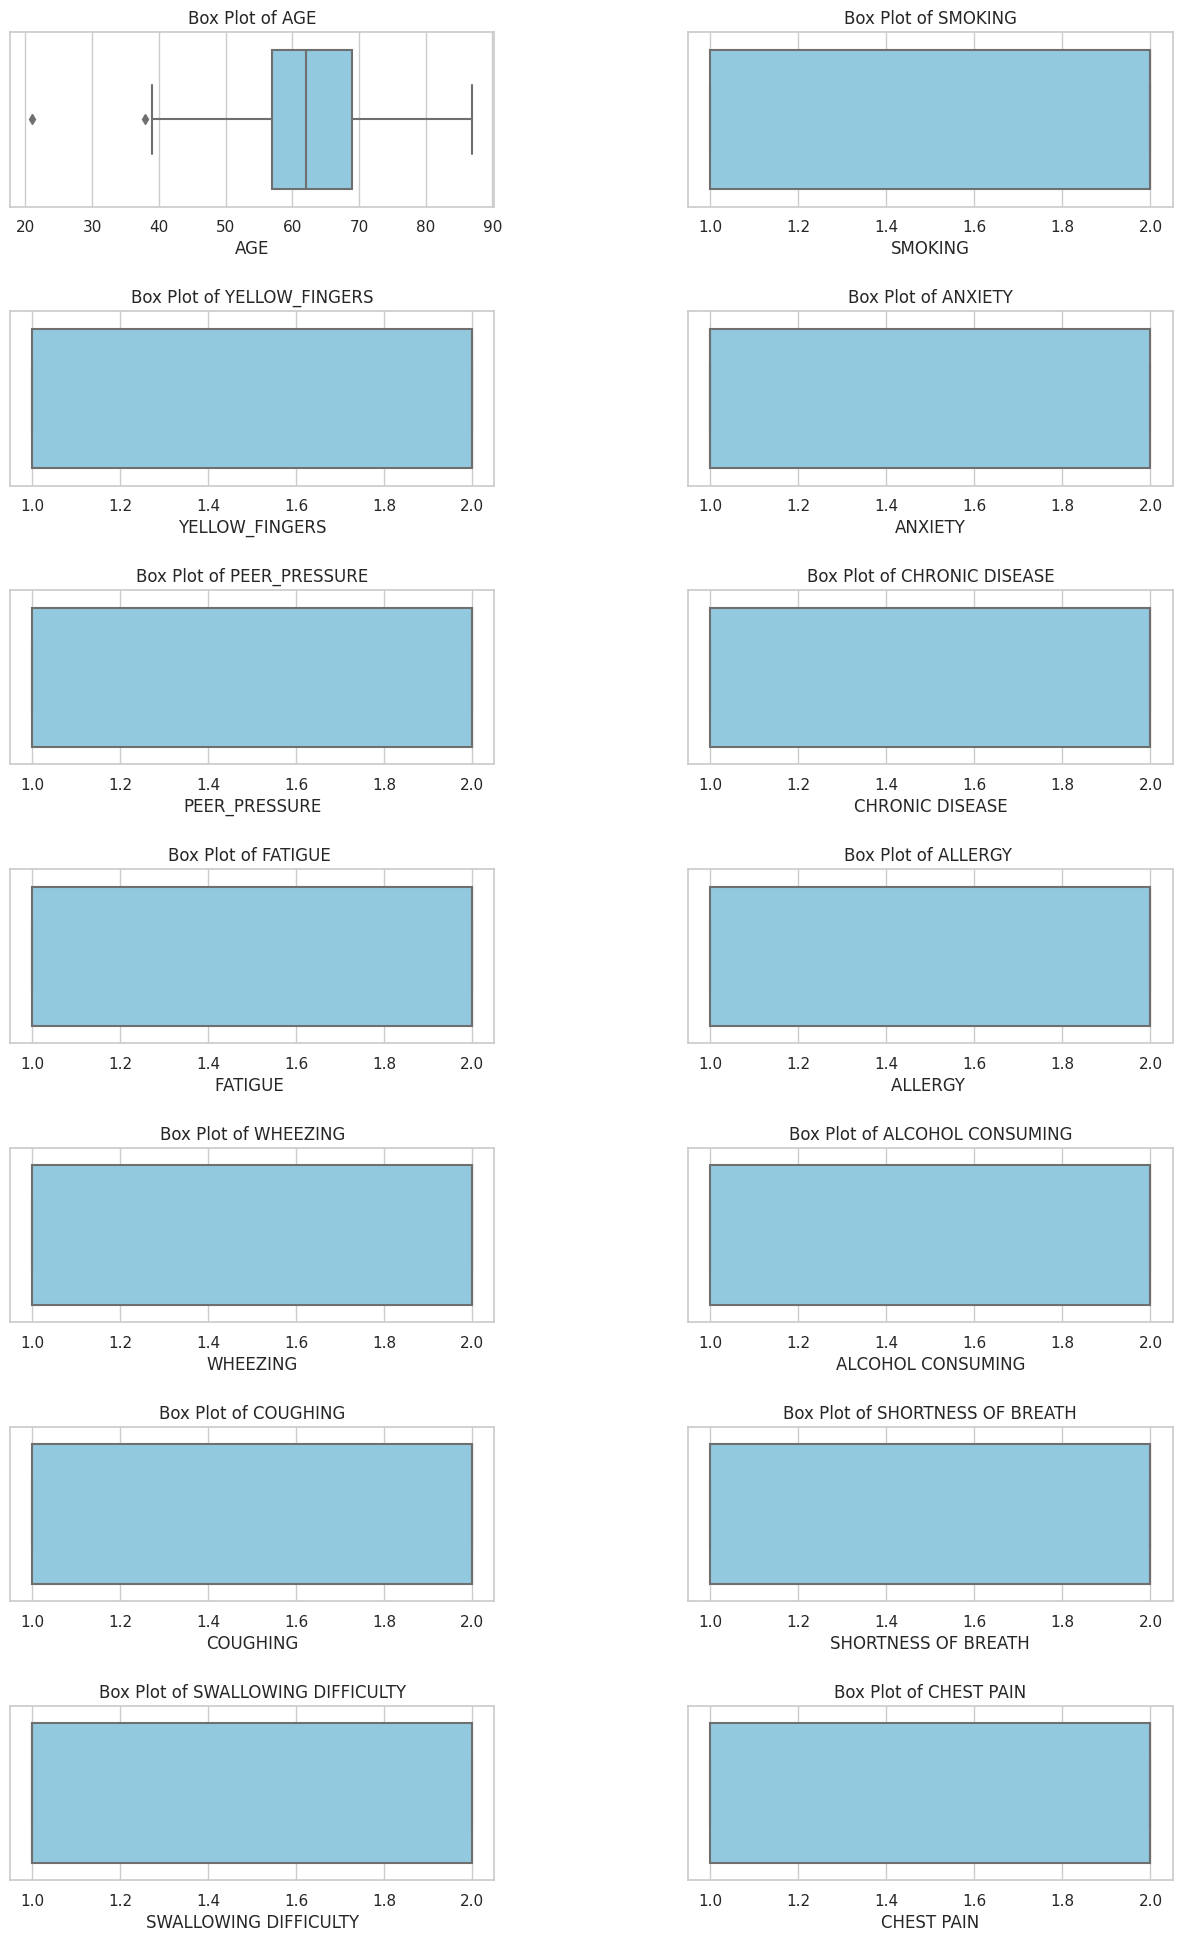

In [68]:
# Handling Outliers with Box Plots
numerical_columns = df.select_dtypes(include=['number']).columns
num_plots = len(numerical_columns)

# Specify the number of rows and columns based on the number of numerical columns
num_rows = (num_plots // 2) + (num_plots % 2)
num_cols = 2

plt.figure(figsize=(15, 24))
for i, column in enumerate(numerical_columns, 1):
    plt.subplot(num_rows, num_cols, i)
    sns.boxplot(x=df[column], color='skyblue')
    plt.title(f'Box Plot of {column}')
    plt.xlabel(column)

# Adjust the spacing between subplots
plt.subplots_adjust(wspace=0.4, hspace=0.6)

plt.show()


---